In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def format_estimator_labels():
    pass

In [3]:
def format_selector_labels():
    pass

# Original Images

In [4]:
results_orig = pd.read_csv(
    './../../data_source/results/original_images/results_all_features_original_images.csv',
    index_col=0
)
results_orig.head()

,exp_id,experiment_id,LinearDiscriminantEstimator__n_components,LinearDiscriminantEstimator__tol,test_score,train_score,test_score_variance,train_score_variance,feature_votes,StudentTTestSelection__num_features,...,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,ExtraTreesEstimator__criterion,ExtraTreesEstimator__max_depth,ExtraTreesEstimator__max_features,ExtraTreesEstimator__min_samples_leaf,ExtraTreesEstimator__n_estimators,exp_duration
0,0,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.551190,0.8,0.017581,0.16,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.483608,0.5,0.007711,0.25,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.483608,0.5,0.007711,0.25,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.522161,0.6,0.012522,0.24,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.545055,0.4,0.013644,0.24,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
results_orig.shape

(2800, 57)

In [6]:
_selector_lbls, _estimator_lbls = [], []
for label in np.unique(results_orig['experiment_id']):
    
    selector_lbl, estimator_lbl = label.split('_')

    _selector_lbls.append(selector_lbl)
    _estimator_lbls.append(estimator_lbl)

selector_lbls = np.unique(_selector_lbls)
estimator_lbls = np.unique(_estimator_lbls)

In [7]:
selector_lbls

array(['ChiSquareSelection', 'DummySelection', 'FisherScoreSelection',
       'MutualInformationSelection', 'ReliefFSelection',
       'StudentTTestSelection', 'WilcoxonSelection'], dtype='<U26')

In [8]:
to_drop = ['ElasticNetEstimator']
estimator_lbls = [label for label in estimator_lbls if not label in to_drop]
estimator_lbls

['DTreeEstimator',
 'ExtraTreesEstimator',
 'KNNEstimator',
 'LightGBM',
 'LinearDiscriminantEstimator',
 'LogRegEstimator',
 'QuadraticDiscriminantEstimator',
 'RFEstimator',
 'SVCEstimator',
 'XGBoost']

In [9]:
orig_results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
for row_num, estimator_lbl in enumerate(estimator_lbls):
    for col_num, selector_lbl in enumerate(selector_lbls):
        
        label = f'{selector_lbl}_{estimator_lbl}'
        location = np.where(label == np.array(results_orig['experiment_id']))
        scores = results_orig.iloc[np.squeeze(location), :]['test_score']
        
        orig_results_mat[row_num, col_num] = np.mean(scores)

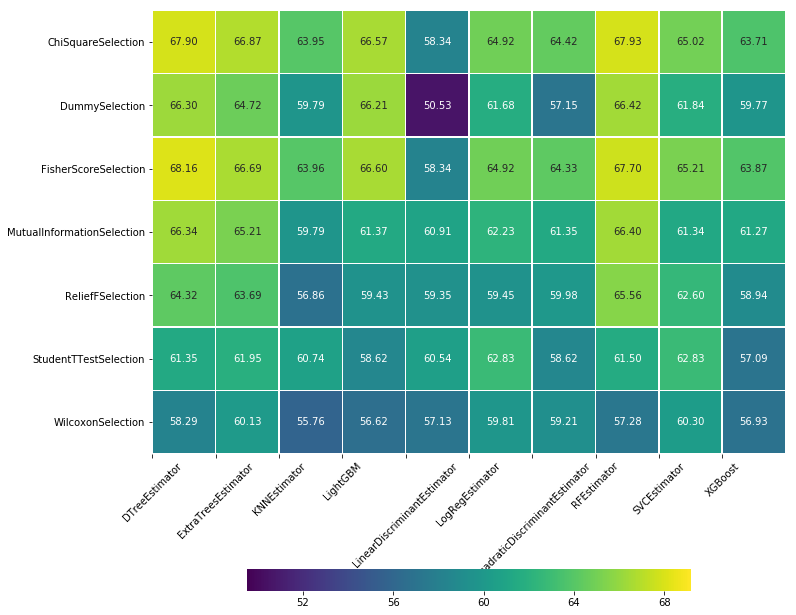

In [10]:
plt.figure(figsize=(11, 11))
hmap = sns.heatmap(
    orig_results_mat.T * 100,
    yticklabels=selector_lbls,
    xticklabels=estimator_lbls,
    vmin=np.nanmin(orig_results_mat) * 100 - 1, 
    vmax=np.nanmax(orig_results_mat) * 100 + 1,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.7, 'orientation': 'horizontal'},  
)
plt.xticks(np.arange(len(estimator_lbls)), rotation=45, ha='center')
plt.tight_layout()
#plt.savefig(
#    './../../../figures/50evals_50reps_univariate_dfs.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [23]:
print(np.sum(orig_results_mat > 0.677))
print((np.max(orig_results_mat) - 0.677) * 100)

4
0.46414835164835244


# Removed Broken Slices

In [12]:
results_rs = pd.read_csv(
    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
    index_col=0
)
results_rs.head()

,exp_id,experiment_id,LinearDiscriminantEstimator__n_components,LinearDiscriminantEstimator__tol,test_score,train_score,test_score_variance,train_score_variance,feature_votes,StudentTTestSelection__num_features,...,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,ExtraTreesEstimator__criterion,ExtraTreesEstimator__max_depth,ExtraTreesEstimator__max_features,ExtraTreesEstimator__min_samples_leaf,ExtraTreesEstimator__n_estimators,exp_duration
0,0,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.505641,0.5,0.012844,0.25,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.500513,0.6,0.024975,0.24,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.500513,0.6,0.024975,0.24,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.533846,0.8,0.011720,0.16,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.461795,0.3,0.021064,0.21,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
results_rs.shape

(2800, 57)

In [14]:
_selector_lbls, _estimator_lbls = [], []
for label in np.unique(results_rs['experiment_id']):
    
    selector_lbl, estimator_lbl = label.split('_')

    _selector_lbls.append(selector_lbl)
    _estimator_lbls.append(estimator_lbl)

selector_lbls = np.unique(_selector_lbls)
estimator_lbls = np.unique(_estimator_lbls)

In [15]:
to_drop = ['ANOVAFvalueSelection']
selector_lbls = np.array([label for label in selector_lbls if not label in to_drop])

selector_lbls

array(['ChiSquareSelection', 'DummySelection', 'FisherScoreSelection',
       'MutualInformationSelection', 'ReliefFSelection',
       'StudentTTestSelection', 'WilcoxonSelection'], dtype='<U26')

In [16]:
estimator_lbls

array(['DTreeEstimator', 'ExtraTreesEstimator', 'KNNEstimator',
       'LightGBM', 'LinearDiscriminantEstimator', 'LogRegEstimator',
       'QuadraticDiscriminantEstimator', 'RFEstimator', 'SVCEstimator',
       'XGBoost'], dtype='<U30')

In [17]:
rs_results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
for row_num, estimator_lbl in enumerate(estimator_lbls):
    for col_num, selector_lbl in enumerate(selector_lbls):
        
        label = f'{selector_lbl}_{estimator_lbl}'
        location = np.where(label == np.array(results_rs['experiment_id']))
        scores = results_rs.iloc[np.squeeze(location), :]['test_score']
        
        rs_results_mat[row_num, col_num] = np.mean(scores)

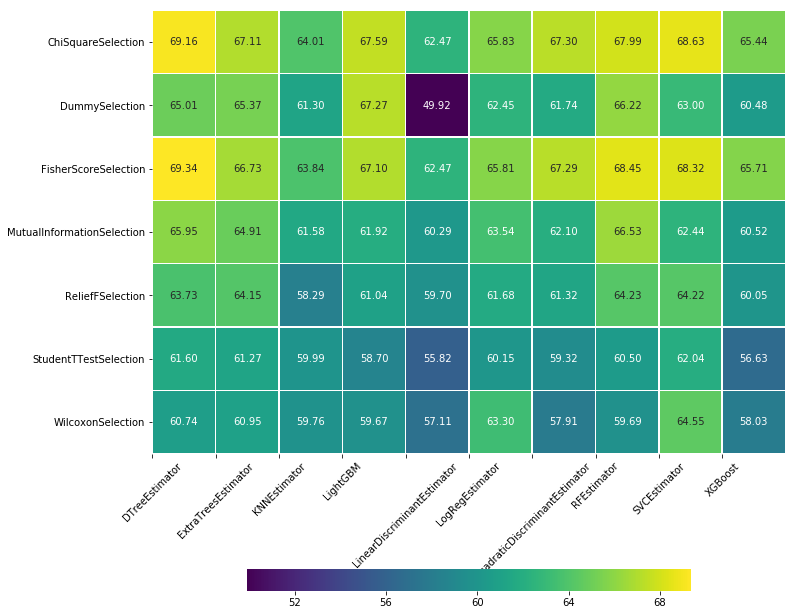

In [18]:
plt.figure(figsize=(11, 11))
hmap = sns.heatmap(
    rs_results_mat.T * 100,
    yticklabels=selector_lbls,
    xticklabels=estimator_lbls,
    vmin=np.nanmin(rs_results_mat) * 100 - 1e-4, 
    vmax=np.nanmax(rs_results_mat) * 100 + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.7, 'orientation': 'horizontal'},  
)
plt.xticks(np.arange(len(estimator_lbls)), rotation=45, ha='center')
plt.tight_layout()
#plt.savefig(
#    './../../../figures/50evals_50reps_univariate_dfs.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [24]:
print(np.sum(rs_results_mat > 0.684))
print((np.max(rs_results_mat) - 0.684) * 100)

4
0.9378205128205308
